# Import tools

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

# Create data frame

In [2]:
df = pd.read_csv('dataset/crime.csv', encoding='latin1')

In [3]:
df.head()

INCIDENT_NUMBER  OFFENSE_CODE  OFFENSE_CODE_GROUP  \
0      I182080058          2403  Disorderly Conduct   
1      I182080053          3201       Property Lost   
2      I182080052          2647               Other   
3      I182080051           413  Aggravated Assault   
4      I182080050          3122            Aircraft   

              OFFENSE_DESCRIPTION DISTRICT REPORTING_AREA SHOOTING  \
0            DISTURBING THE PEACE      E18            495      NaN   
1                 PROPERTY - LOST      D14            795      NaN   
2       THREATS TO DO BODILY HARM       B2            329      NaN   
3  ASSAULT - AGGRAVATED - BATTERY       A1             92      NaN   
4              AIRCRAFT INCIDENTS       A7             36      NaN   

      OCCURRED_ON_DATE  YEAR  MONTH DAY_OF_WEEK  HOUR    UCR_PART  \
0  2018-10-03 20:13:00  2018     10   Wednesday    20    Part Two   
1  2018-08-30 20:00:00  2018      8    Thursday    20  Part Three   
2  2018-10-03 19:20:00  2018     10   Wednesday    19    Part Two   
3  2018-10-03 20:00:00  2018     10   Wednesday    20    Part One   
4  2018-10-03 20:49:00  2018     10   Wednesday    20  Part Three   

         STREET        Lat       Long                     Location  
0  ARLINGTON ST  42.262608 -71.121186  (42.26260773, -71.12118637)  
1    ALLSTON ST  42.352111 -71.135311  (42.35211146, -71.13531147)  
2      DEVON ST  42.308126 -71.076930  (42.30812619, -71.07692974)  
3  CAMBRIDGE ST  42.359454 -71.059648  (42.35945371, -71.05964817)  
4   PRESCOTT ST  42.375258 -71.024663  (42.37525782, -71.02466343)

In [4]:
df.describe()

OFFENSE_CODE           YEAR          MONTH           HOUR  \
count  327820.000000  327820.000000  327820.000000  327820.000000   
mean     2317.961171    2016.598676       6.672213      13.114840   
std      1184.990073       1.009775       3.253984       6.292714   
min       111.000000    2015.000000       1.000000       0.000000   
25%      1001.000000    2016.000000       4.000000       9.000000   
50%      2907.000000    2017.000000       7.000000      14.000000   
75%      3201.000000    2017.000000       9.000000      18.000000   
max      3831.000000    2018.000000      12.000000      23.000000   

                 Lat           Long  
count  307188.000000  307188.000000  
mean       42.212995     -70.906030  
std         2.173496       3.515832  
min        -1.000000     -71.178674  
25%        42.297466     -71.097081  
50%        42.325552     -71.077493  
75%        42.348624     -71.062482  
max        42.395042      -1.000000

In [5]:
print(df.OFFENSE_CODE_GROUP.unique())
crime_count = df['INCIDENT_NUMBER'].count()

['Disorderly Conduct' 'Property Lost' 'Other' 'Aggravated Assault'
 'Aircraft' 'Vandalism' 'Motor Vehicle Accident Response'
 'Verbal Disputes' 'Simple Assault' 'Towed' 'Auto Theft'
 'Medical Assistance' 'Investigate Person' 'Fire Related Reports'
 'Larceny' 'Investigate Property' 'Harassment' 'Robbery' 'Drug Violation'
 'Violations' 'Liquor Violation' 'Fraud' 'Warrant Arrests'
 'Recovered Stolen Property' 'Residential Burglary'
 'Restraining Order Violations' 'Property Found' 'Missing Person Reported'
 'Confidence Games' 'Ballistics' 'Larceny From Motor Vehicle'
 'HOME INVASION' 'Landlord/Tenant Disputes' 'Firearm Violations'
 'Missing Person Located' 'Prisoner Related Incidents'
 'Auto Theft Recovery' 'License Plate Related Incidents' 'Embezzlement'
 'Property Related Damage' 'Other Burglary'
 'Operating Under the Influence' 'Commercial Burglary'
 'Police Service Incidents' 'Arson' 'License Violation'
 'Assembly or Gathering Violations' 'Counterfeiting' 'Search Warrants'
 'Phone Call

In [6]:
df['SHOOTING'].shape

(327820,)

# Distribusi Peluang

#### Distribusi peluang yang digunakan : Distribusi binomial, karena pengambilan data besifat independen dan pencarian ekspektasi dilakukan dengan mencari peluang terjadinya suatu kejahatan lalu mengalikan peluang tersebut dengan jumlah kejahatan baru.

# Jawaban pertanyaan

## A

### a. i.

In [7]:
values = df['OFFENSE_CODE_GROUP'].value_counts().keys().tolist()
counts = df['OFFENSE_CODE_GROUP'].value_counts().tolist()
d = {'OFFENSE' : values, 'COUNT' : counts, 'PERCENTAGE' : [x / crime_count for x in counts]}
df_offense = pd.DataFrame(data=d)
df_offense.head()

OFFENSE  COUNT  PERCENTAGE
0  Motor Vehicle Accident Response  38134    0.116326
1                          Larceny  26670    0.081356
2               Medical Assistance  24226    0.073900
3               Investigate Person  19176    0.058496
4                            Other  18612    0.056775

In [8]:
df_homicide = df[df['OFFENSE_CODE_GROUP'] == "Homicide"]
homicide_count = df_homicide['OFFENSE_CODE_GROUP'].count()
print("Ekspektasi homicide 1000 orang baru adalah ", homicide_count / crime_count * 1000)

Ekspektasi homicide 1000 orang baru adalah  0.5033249954243183


### a. ii.

In [9]:
df_shoot = df[df['SHOOTING'].isnull()]
df_shoot['OFFENSE_CODE_GROUP'].value_counts()

values = df_shoot['OFFENSE_CODE_GROUP'].value_counts().keys().tolist()
counts = df_shoot['OFFENSE_CODE_GROUP'].value_counts().tolist()
d = {'OFFENSE' : values, 'COUNT' : counts, 'PERCENTAGE' : [x / crime_count for x in counts]}
df_offense_shoot = pd.DataFrame(data=d)
df_offense_shoot.head()

OFFENSE  COUNT  PERCENTAGE
0  Motor Vehicle Accident Response  38128    0.116308
1                          Larceny  26670    0.081356
2               Medical Assistance  24206    0.073839
3               Investigate Person  19168    0.058471
4                            Other  18597    0.056729

In [10]:
homicide = df[(df['OFFENSE_CODE_GROUP'] == 'Homicide') & (df['SHOOTING'].isnull())]
homicide_shooting_count = homicide['INCIDENT_NUMBER'].count()
print("Ekspektasi homicide tanpa shooting 1000 orang baru adalah ", 
      homicide_shooting_count / crime_count * 1000)

Ekspektasi homicide tanpa shooting 1000 orang baru adalah  0.1281190897443719


### a. iii.

In [11]:
df_jam20_sabtu = df[(df['OCCURRED_ON_DATE'].str.split(" ").str.get(-1) == "20:00:00") & (df['DAY_OF_WEEK'] == 'Saturday')]
jam20_sabtu_count = df_jam20_sabtu['INCIDENT_NUMBER'].count()
print("Ekspektasi kejahatan terjadi pada 20:00 hari Sabtu oleh 1000 orang baru adalah ", 
      jam20_sabtu_count / crime_count * 1000)

Ekspektasi kejahatan terjadi pada 20:00 hari Sabtu oleh 1000 orang baru adalah  1.1835763528765786


## B

### b. i.

In [12]:
df_b1 = df[(df['STREET'] == 'GENEVA AVE') | (df['STREET'] == 'PRESCOTT ST')]
b1_count = df_b1['INCIDENT_NUMBER'].count()
print("Ekspektasi kejahatan pada Geneva Ave dan Prescott Street oleh 2000 orang baru adalah ", 
      b1_count / crime_count * 2000)

Ekspektasi kejahatan pada Geneva Ave dan Prescott Street oleh 2000 orang baru adalah  11.219571716185712


### b. ii.

In [13]:
df_b2 = df[(df['REPORTING_AREA'] == '495') & (df['DISTRICT'] == 'E18')]
b2_count = df_b2['INCIDENT_NUMBER'].count()
print("Ekspektasi kejahatan yang dilaporkan di area 495 dan dsitrik E18 oleh 2000 orang baru adalah ", 
      b2_count / crime_count * 2000)

Ekspektasi kejahatan yang dilaporkan di area 495 dan dsitrik E18 oleh 2000 orang baru adalah  3.019949972545909


### b. iii.

In [14]:
df_b3 = df[(~(df['DAY_OF_WEEK'] == 'Saturday')) & (~(df['DAY_OF_WEEK'] == 'Sunday'))]
b3_count = df_b3['INCIDENT_NUMBER'].count()
print("Ekspektasi kejahatan yang tidak terjadi pada hari libur oleh 2000 orang baru adalah ", 
      b3_count / crime_count * 2000)

Ekspektasi kejahatan yang tidak terjadi pada hari libur oleh 2000 orang baru adalah  1467.1283021170154


# Visualisasi Data

## Histogram

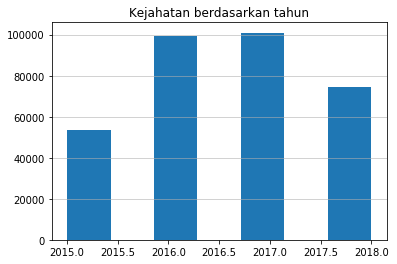

In [15]:
plt.hist(df['YEAR'], bins=7)
plt.title('Kejahatan berdasarkan tahun')
plt.grid(axis='y', alpha=0.7)
plt.show()

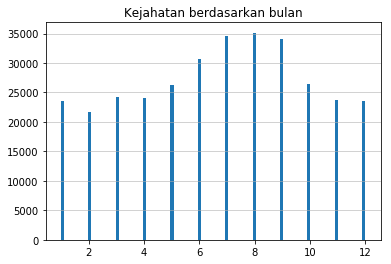

In [16]:
plt.hist(df['MONTH'], bins=100)
plt.title('Kejahatan berdasarkan bulan')
plt.grid(axis='y', alpha=0.7)
plt.show()

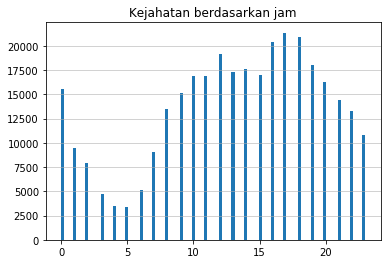

In [17]:
plt.hist(df['HOUR'], bins=100)
plt.title('Kejahatan berdasarkan jam')
plt.grid(axis='y', alpha=0.7)
plt.show()

## Box plot

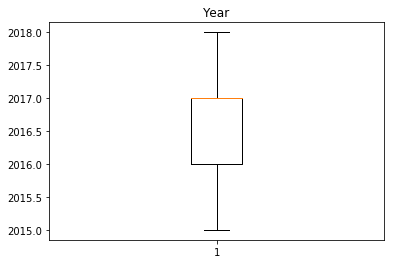

In [18]:
plt.boxplot(df["YEAR"])
plt.title('Year')
plt.show()

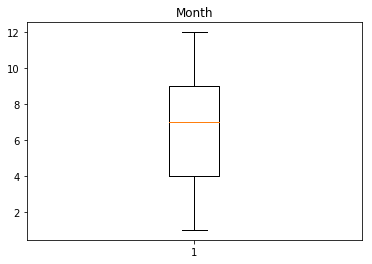

In [19]:
plt.boxplot(df["MONTH"])
plt.title('Month')
plt.show()

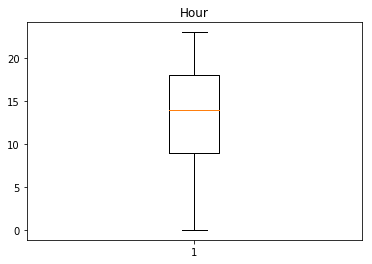

In [20]:
plt.boxplot(df["HOUR"])
plt.title('Hour')
plt.show()

# Statistical description

## YEAR

In [21]:
print(df['YEAR'].describe(),'\nmode :', df['YEAR'].mode(), '\nvariance : ', df['YEAR'].var(), 
      '\nSkewness : ', df['YEAR'].skew(),'\nKurtosis : ', df['YEAR'].kurt())

count    327820.000000
mean       2016.598676
std           1.009775
min        2015.000000
25%        2016.000000
50%        2017.000000
75%        2017.000000
max        2018.000000
Name: YEAR, dtype: float64 
mode : 0    2017
dtype: int64 
variance :  1.0196450645892663 
Skewness :  -0.08380465678614209 
Kurtosis :  -1.0904107143209572


## MONTH

In [22]:
print(df['MONTH'].describe(),'\nmode :', df['MONTH'].mode(), '\nvariance : ', 
      df['MONTH'].var(),'\nSkewness : ', df['MONTH'].skew(),'\nKurtosis : ', df['MONTH'].kurt())

count    327820.000000
mean          6.672213
std           3.253984
min           1.000000
25%           4.000000
50%           7.000000
75%           9.000000
max          12.000000
Name: MONTH, dtype: float64 
mode : 0    8
dtype: int64 
variance :  10.588412178518789 
Skewness :  -0.11959105568488788 
Kurtosis :  -1.0357420204389443


## HOUR

In [23]:
print(df['HOUR'].describe(),'\nmode :', df['HOUR'].mode(), '\nvariance : ', 
      df['HOUR'].var(), '\nSkewness : ', df['HOUR'].skew(),'\nKurtosis : ', df['HOUR'].kurt())

count    327820.000000
mean         13.114840
std           6.292714
min           0.000000
25%           9.000000
50%          14.000000
75%          18.000000
max          23.000000
Name: HOUR, dtype: float64 
mode : 0    17
dtype: int64 
variance :  39.598252697848885 
Skewness :  -0.48293784833360087 
Kurtosis :  -0.6007362569709942


## OFFENSE CODE

In [24]:
print(df['OFFENSE_CODE'].mode())

0    3006
dtype: int64


## OFFENSE CODE GROUP

In [25]:
print(df['OFFENSE_CODE_GROUP'].mode())

0    Motor Vehicle Accident Response
dtype: object


## OFFENSE DESCRIPTION

In [26]:
print(df['OFFENSE_DESCRIPTION'].mode())

0    SICK/INJURED/MEDICAL - PERSON
dtype: object


## DISTRICT

In [27]:
print(df['DISTRICT'].mode())

0    B2
dtype: object


## STREET

In [28]:
print(df['STREET'].mode())

0    WASHINGTON ST
dtype: object


## REPORTING AREA

In [29]:
print(df['REPORTING_AREA'].mode())

0     
dtype: object


## DAY OF WEEK

In [30]:
print(df['DAY_OF_WEEK'].mode())

0    Friday
dtype: object


## OCCURRED ON DATE

In [31]:
print(df['OCCURRED_ON_DATE'].mode())

0    2016-08-01 00:00:00
1    2017-06-01 00:00:00
dtype: object


## UCR PART

In [32]:
print(df['UCR_PART'].mode())

0    Part Three
dtype: object
